<a href="https://colab.research.google.com/github/karthik40121/OIB-SIP/blob/main/PROJECT_4_PROPOSAL_LEVEL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Static viz
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive viz
import plotly.express as px

# Text / sentiment
from textblob import TextBlob

# Display settings
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)


In [ ]:
!pip install textblob


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_reviews.csv to user_reviews.csv


In [ ]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

print("Apps shape:", apps.shape)
print("Reviews shape:", reviews.shape)

apps.head()


Apps shape: (9659, 14)
Reviews shape: (64295, 5)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
print(apps.info())
print("\nMissing values per column:\n", apps.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None

Missing values per column:
 Unnamed: 0           0
App                  0
Category             0
Rating 

In [ ]:
apps_clean = apps.drop_duplicates(subset=['App'])
apps_clean = apps_clean.dropna(subset=['Rating'])

print("Shape after cleaning:", apps_clean.shape)


Shape after cleaning: (8196, 14)


In [ ]:
# Clean Installs: remove '+' and ',' then convert to int
apps_clean['Installs'] = apps_clean['Installs'].str.replace('+', '', regex=False)
apps_clean['Installs'] = apps_clean['Installs'].str.replace(',', '', regex=False)
apps_clean['Installs'] = apps_clean['Installs'].astype(int)

# Clean Price: remove '$' and convert to float
apps_clean['Price'] = apps_clean['Price'].str.replace('$', '', regex=False).astype(float)


In [ ]:
def size_to_mb(size_str):
    if isinstance(size_str, str):
        size_str = size_str.strip()
        if size_str.endswith('M'):
            return float(size_str.replace('M', ''))
        elif size_str.endswith('k'):
            return float(size_str.replace('k', '')) / 1024  # kB to MB
        elif size_str == 'Varies with device':
            return np.nan
    return np.nan

apps_clean['Size_MB'] = apps_clean['Size'].apply(size_to_mb)

# Optionally fill missing sizes with median
median_size = apps_clean['Size_MB'].median()
apps_clean['Size_MB'].fillna(median_size, inplace=True)

apps_clean[['Size', 'Size_MB']].head()


/tmp/ipython-input-4125858337.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_clean['Size_MB'].fillna(median_size, inplace=True)


,Size,Size_MB
0,19.0,NaN
1,14.0,NaN
2,8.7,NaN
3,25.0,NaN
4,2.8,NaN


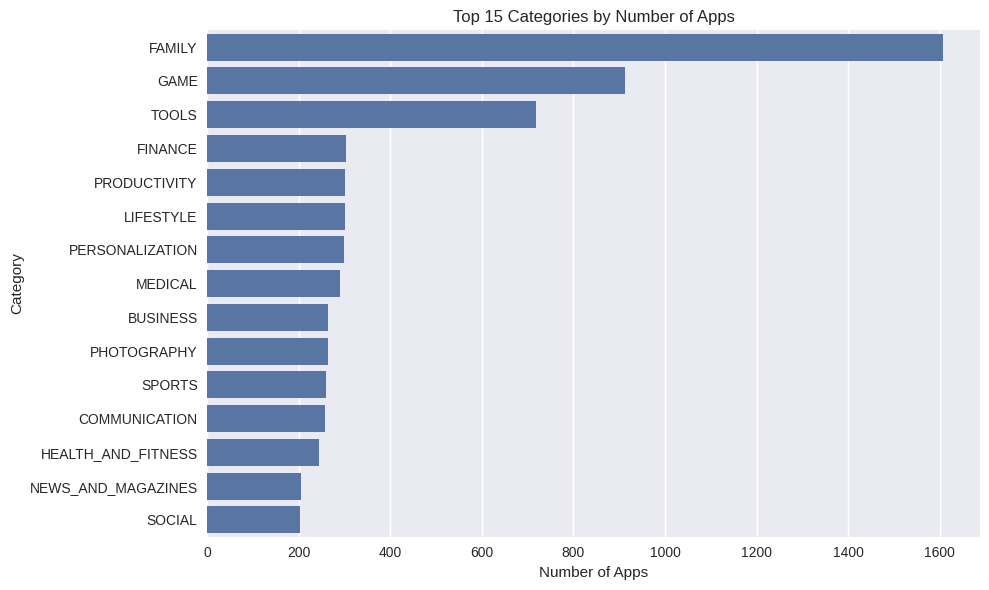

In [ ]:
category_counts = apps_clean['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'App_Count']

plt.figure(figsize=(10,6))
sns.barplot(x='App_Count', y='Category', data=category_counts.head(15))
plt.title("Top 15 Categories by Number of Apps")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [ ]:
fig = px.bar(category_counts.head(20),
             x='Category', y='App_Count',
             title="App Distribution Across Categories (Top 20)",
             labels={'App_Count': 'Number of Apps'},
             hover_data=['App_Count'])
fig.update_layout(xaxis_tickangle=-45)
fig.show()


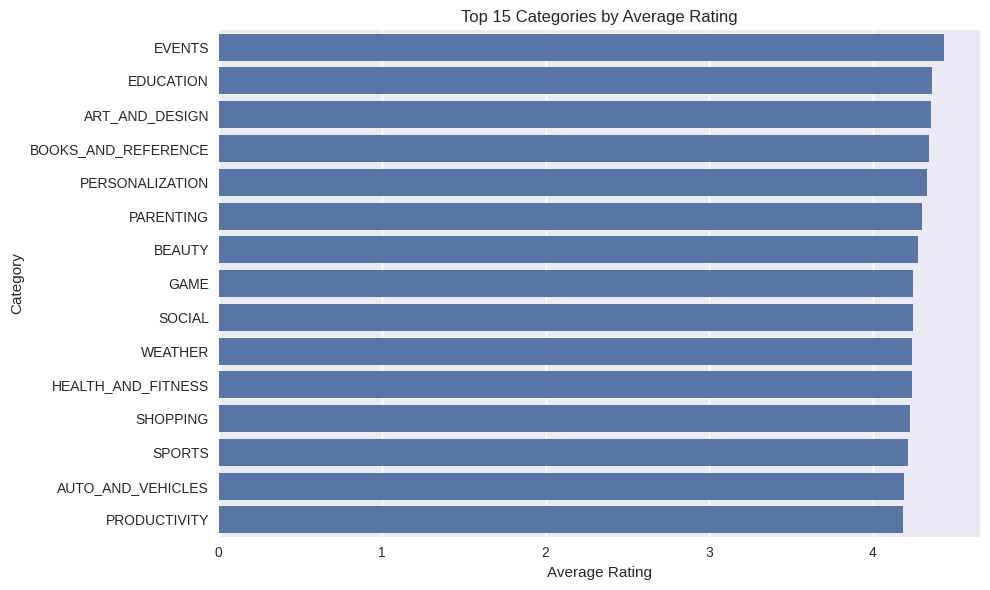

In [ ]:
cat_rating = apps_clean.groupby('Category')['Rating'].mean().reset_index()
cat_rating = cat_rating.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='Category', data=cat_rating.head(15))
plt.title("Top 15 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


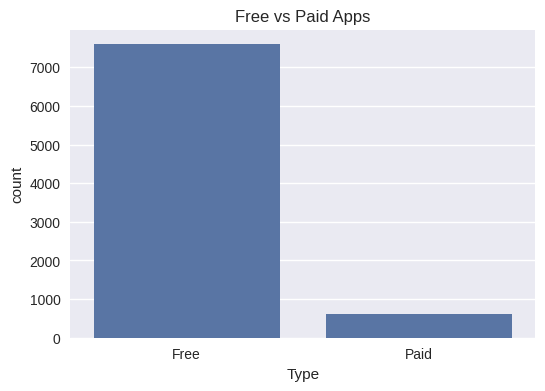

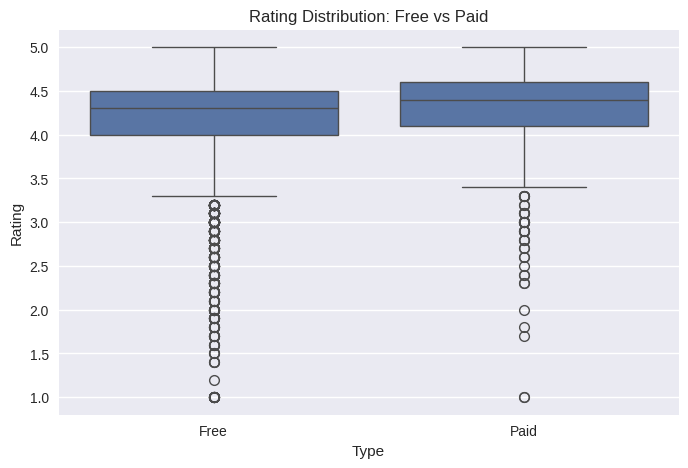

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=apps_clean)
plt.title("Free vs Paid Apps")
plt.show()

# Compare rating distribution for Free vs Paid
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=apps_clean)
plt.title("Rating Distribution: Free vs Paid")
plt.show()


In [ ]:
fig = px.scatter(apps_clean,
                 x='Installs', y='Rating',
                 color='Type',
                 hover_name='App',
                 title="Installs vs Rating (Free vs Paid)",
                 trendline="ols",
                 opacity=0.7)
fig.update_layout(xaxis_type='log')  # log-scale for installs
fig.show()


In [ ]:
fig = px.scatter(apps_clean,
                 x='Size_MB', y='Rating',
                 color='Category',
                 hover_name='App',
                 title="App Size vs Rating")
fig.show()


In [ ]:
reviews.head()
print(reviews['Sentiment'].value_counts())


Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64


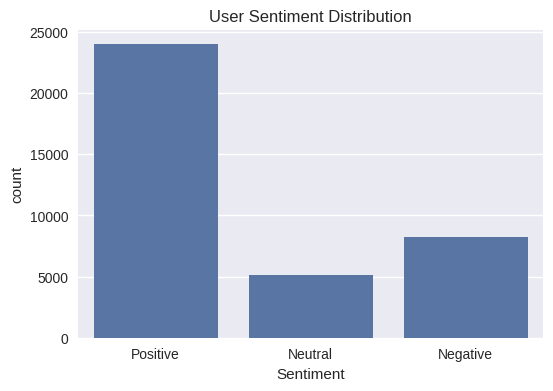

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=reviews)
plt.title("User Sentiment Distribution")
plt.show()


In [ ]:
# If column already exists in your CSV, comment this section
def get_polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0

if 'Sentiment_Polarity' not in reviews.columns:
    reviews['Sentiment_Polarity'] = reviews['Translated_Review'].apply(get_polarity)

reviews[['Sentiment', 'Sentiment_Polarity']].head()


,Sentiment,Sentiment_Polarity
0,Positive,1.00
1,Positive,0.25
2,NaN,NaN
3,Positive,0.40
4,Positive,1.00


In [ ]:
app_sentiment = reviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()
app_sentiment.columns = ['App', 'Avg_Sentiment']

app_sentiment.head()


,App,Avg_Sentiment
0,10 Best Foods for You,0.470733
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405
2,11st,0.181294
3,1800 Contacts - Lens Store,0.318145
4,1LINE – One Line with One Touch,0.196290


In [ ]:
apps_merged = pd.merge(apps_clean, app_sentiment, on='App', how='left')

print(apps_merged[['App', 'Category', 'Rating', 'Avg_Sentiment']].head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Avg_Sentiment  
0            NaN  
1       0.152652  
2            NaN  
3            NaN  
4            NaN  


In [ ]:
cat_sentiment = apps_merged.groupby('Category')['Avg_Sentiment'].mean().reset_index()
cat_sentiment = cat_sentiment.sort_values(by='Avg_Sentiment', ascending=False)

fig = px.bar(cat_sentiment.head(20),
             x='Category', y='Avg_Sentiment',
             title="Average User Sentiment by Category (Top 20)",
             labels={'Avg_Sentiment': 'Average Sentiment Polarity'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
fig = px.scatter(apps_merged,
                 x='Rating', y='Avg_Sentiment',
                 color='Category',
                 hover_name='App',
                 title="Rating vs Average Sentiment per App")
fig.show()
